# **Project#1: Handwritten Digit Classification**

**Description:** Use the MNIST dataset to create a model that can identify handwritten
digits. This is a classic problem in computer vision and a great starting point for understanding how
convolutional neural networks (CNNs) work.

# **Installing Libraries**

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

# **Load the MNIST dataset**

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

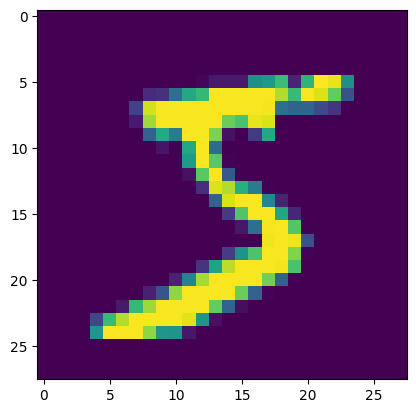

In [ ]:
plt.imshow(x_train[0])

# **Preprocess**

In [ ]:
x_train = x_train.reshape(len(x_train), 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(len(x_test), 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# **Model Architecture**

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')  # Corrected line
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compiling,Training,Evaluating,Saving Model**

In [ ]:
#Compiling
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
#Training
batch_size = 128
epochs = 20
history = model .fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
#Evaluating
score = model.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model
model.save('mnist.keras')
print("Model saved as mnist.keras")



Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.7829 - loss: 0.6761 - val_accuracy: 0.9816 - val_loss: 0.0580
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.9721 - loss: 0.0971 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 107ms/step - accuracy: 0.9813 - loss: 0.0647 - val_accuracy: 0.9877 - val_loss: 0.0389
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9846 - loss: 0.0543 - val_accuracy: 0.9905 - val_loss: 0.0299
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9877 - loss: 0.0435 - val_accuracy: 0.9924 - val_loss: 0.0259
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 152ms/step - accuracy: 0.9897 - loss: 0.0359 - val_accuracy: 0.9920 - val_loss: 0.0259
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.9909 - loss: 0.0307 - val_accuracy: 0.9904 - val_loss: 0.0296
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9916 - loss: 0.

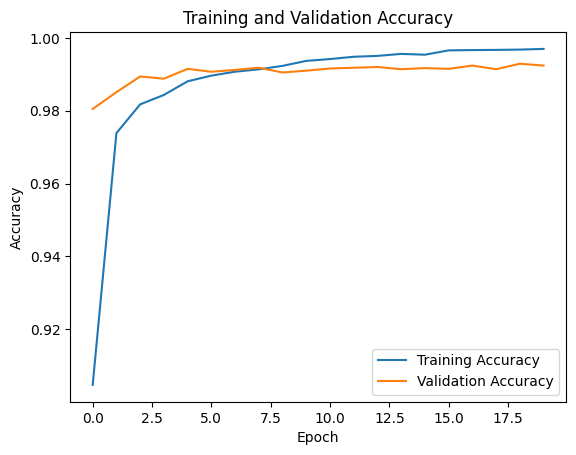

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# **GUI_Handwritten**

# **Install Required Libraries**

# **Upload the model**

In [ ]:
from google.colab import files
files.download('mnist.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mnist.keras to mnist (1).keras


# **Import Libraries and Define Functions**

In [ ]:
from google.colab import output
import numpy as np
import cv2
from keras.models import load_model
from IPython.display import display, HTML

# Load your model
model = load_model('mnist.keras')  # Ensure your model is uploaded

# Create a simple HTML canvas
html = """
<div>
    <canvas id="canvas" width="280" height="280" style="border:1px solid black;"></canvas>
    <br>
    <button onclick="clearCanvas()">Clear Canvas</button>
    <button onclick="predictDigit()">Predict Digit</button>
    <div id="result" style="font-size: 20px; margin-top: 10px;"></div>
</div>

<script>
    var canvas = document.getElementById('canvas');
    var context = canvas.getContext('2d');
    context.fillStyle = 'black';
    context.fillRect(0, 0, canvas.width, canvas.height);

    var drawing = false;

    canvas.addEventListener('mousedown', function(e) {
        drawing = true;
        context.strokeStyle = 'white';
        context.lineWidth = 8;
        context.lineCap = 'round';
        context.beginPath();
        context.moveTo(e.offsetX, e.offsetY);
    });

    canvas.addEventListener('mousemove', function(e) {
        if (drawing) {
            context.lineTo(e.offsetX, e.offsetY);
            context.stroke();
        }
    });

    canvas.addEventListener('mouseup', function() {
        drawing = false;
        context.closePath();
    });

    function clearCanvas() {
        context.fillStyle = 'black';
        context.fillRect(0, 0, canvas.width, canvas.height);
        document.getElementById('result').innerText = '';
    }

    function predictDigit() {
        var dataURL = canvas.toDataURL('image/png');
        google.colab.kernel.invokeFunction('notebook.predict_digit', [dataURL], {});
    }
</script>
"""

display(HTML(html))

# Function to process the image data and predict the digit
def predict_digit(image_data):
    import base64
    from io import BytesIO
    from PIL import Image

    # Decode the base64 image data
    image_data = image_data.split(',')[1]
    image_data = base64.b64decode(image_data)
    image = Image.open(BytesIO(image_data)).convert('L')

    # Convert to numpy array and resize
    img_array = np.array(image)
    img_resized = cv2.resize(img_array, (28, 28), interpolation=cv2.INTER_AREA)
    img_reshaped = img_resized.reshape(1, 28, 28, 1).astype('float32') / 255

    # Make a prediction
    prediction = model.predict(img_reshaped)
    predicted_digit = np.argmax(prediction)

    # Display the result
    output.eval_js(f"document.getElementById('result').innerText = 'Predicted Digit: {predicted_digit}';")

# Register the function to be callable from JS
output.register_callback('notebook.predict_digit', predict_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
